# Problem Statement 
### Building a Multiple linear Regression Model to predict the demand of Shared bike with in a region 
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To address these challenges and prepare for a post-lockdown recovery, the company aims to create a strategic business plan to accelerate revenue growth as the economy improves. They are particularly interested in understanding the factors influencing the demand for shared bikes in the American market after quarantine restrictions end.

 - BoomBikes has hired a consulting firm to analyze a dataset that includes daily bike demand data, considering various factors such as weather conditions and user behavior. The company seeks to identify which variables significantly impact bike demand and how well these factors explain the fluctuations in usage. The insights gained from this analysis will help BoomBikes better cater to customer needs, differentiate itself from competitors, and achieve profitability.

___Importing the required Library___


In [3]:
# For Data managment and Adjustment
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data and Time 
from datetime import datetime as dt 

# To Prevent copy error for being seen 
import warnings
warnings.filterwarnings('ignore')

# For building a Model and Predictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### ___Step 1 : Reading Data___

In [5]:
bikes = pd.read_csv('day.csv', index_col =0)

In [6]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikes.shape

(730, 15)

In [8]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [10]:
bikes.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### ___Segmenting the data for easy Handeling___

___Categorical Variables___

In [13]:
cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']
bikes[cat_columns].nunique()

mnth          12
season         4
yr             2
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [14]:
bikes[cat_columns] = bikes[cat_columns].astype('category')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      730 non-null    object  
 1   season      730 non-null    category
 2   yr          730 non-null    category
 3   mnth        730 non-null    category
 4   holiday     730 non-null    category
 5   weekday     730 non-null    category
 6   workingday  730 non-null    category
 7   weathersit  730 non-null    category
 8   temp        730 non-null    float64 
 9   atemp       730 non-null    float64 
 10  hum         730 non-null    float64 
 11  windspeed   730 non-null    float64 
 12  casual      730 non-null    int64   
 13  registered  730 non-null    int64   
 14  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(3), object(1)
memory usage: 57.7+ KB


In [15]:
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

In [16]:
bikes[num_columns]

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,10.386653,12.12000,75.2917,8.333661,159,1182,1341


### ___Vizualizing the Data___

- Numerical Data Visualization with scatter Plot 

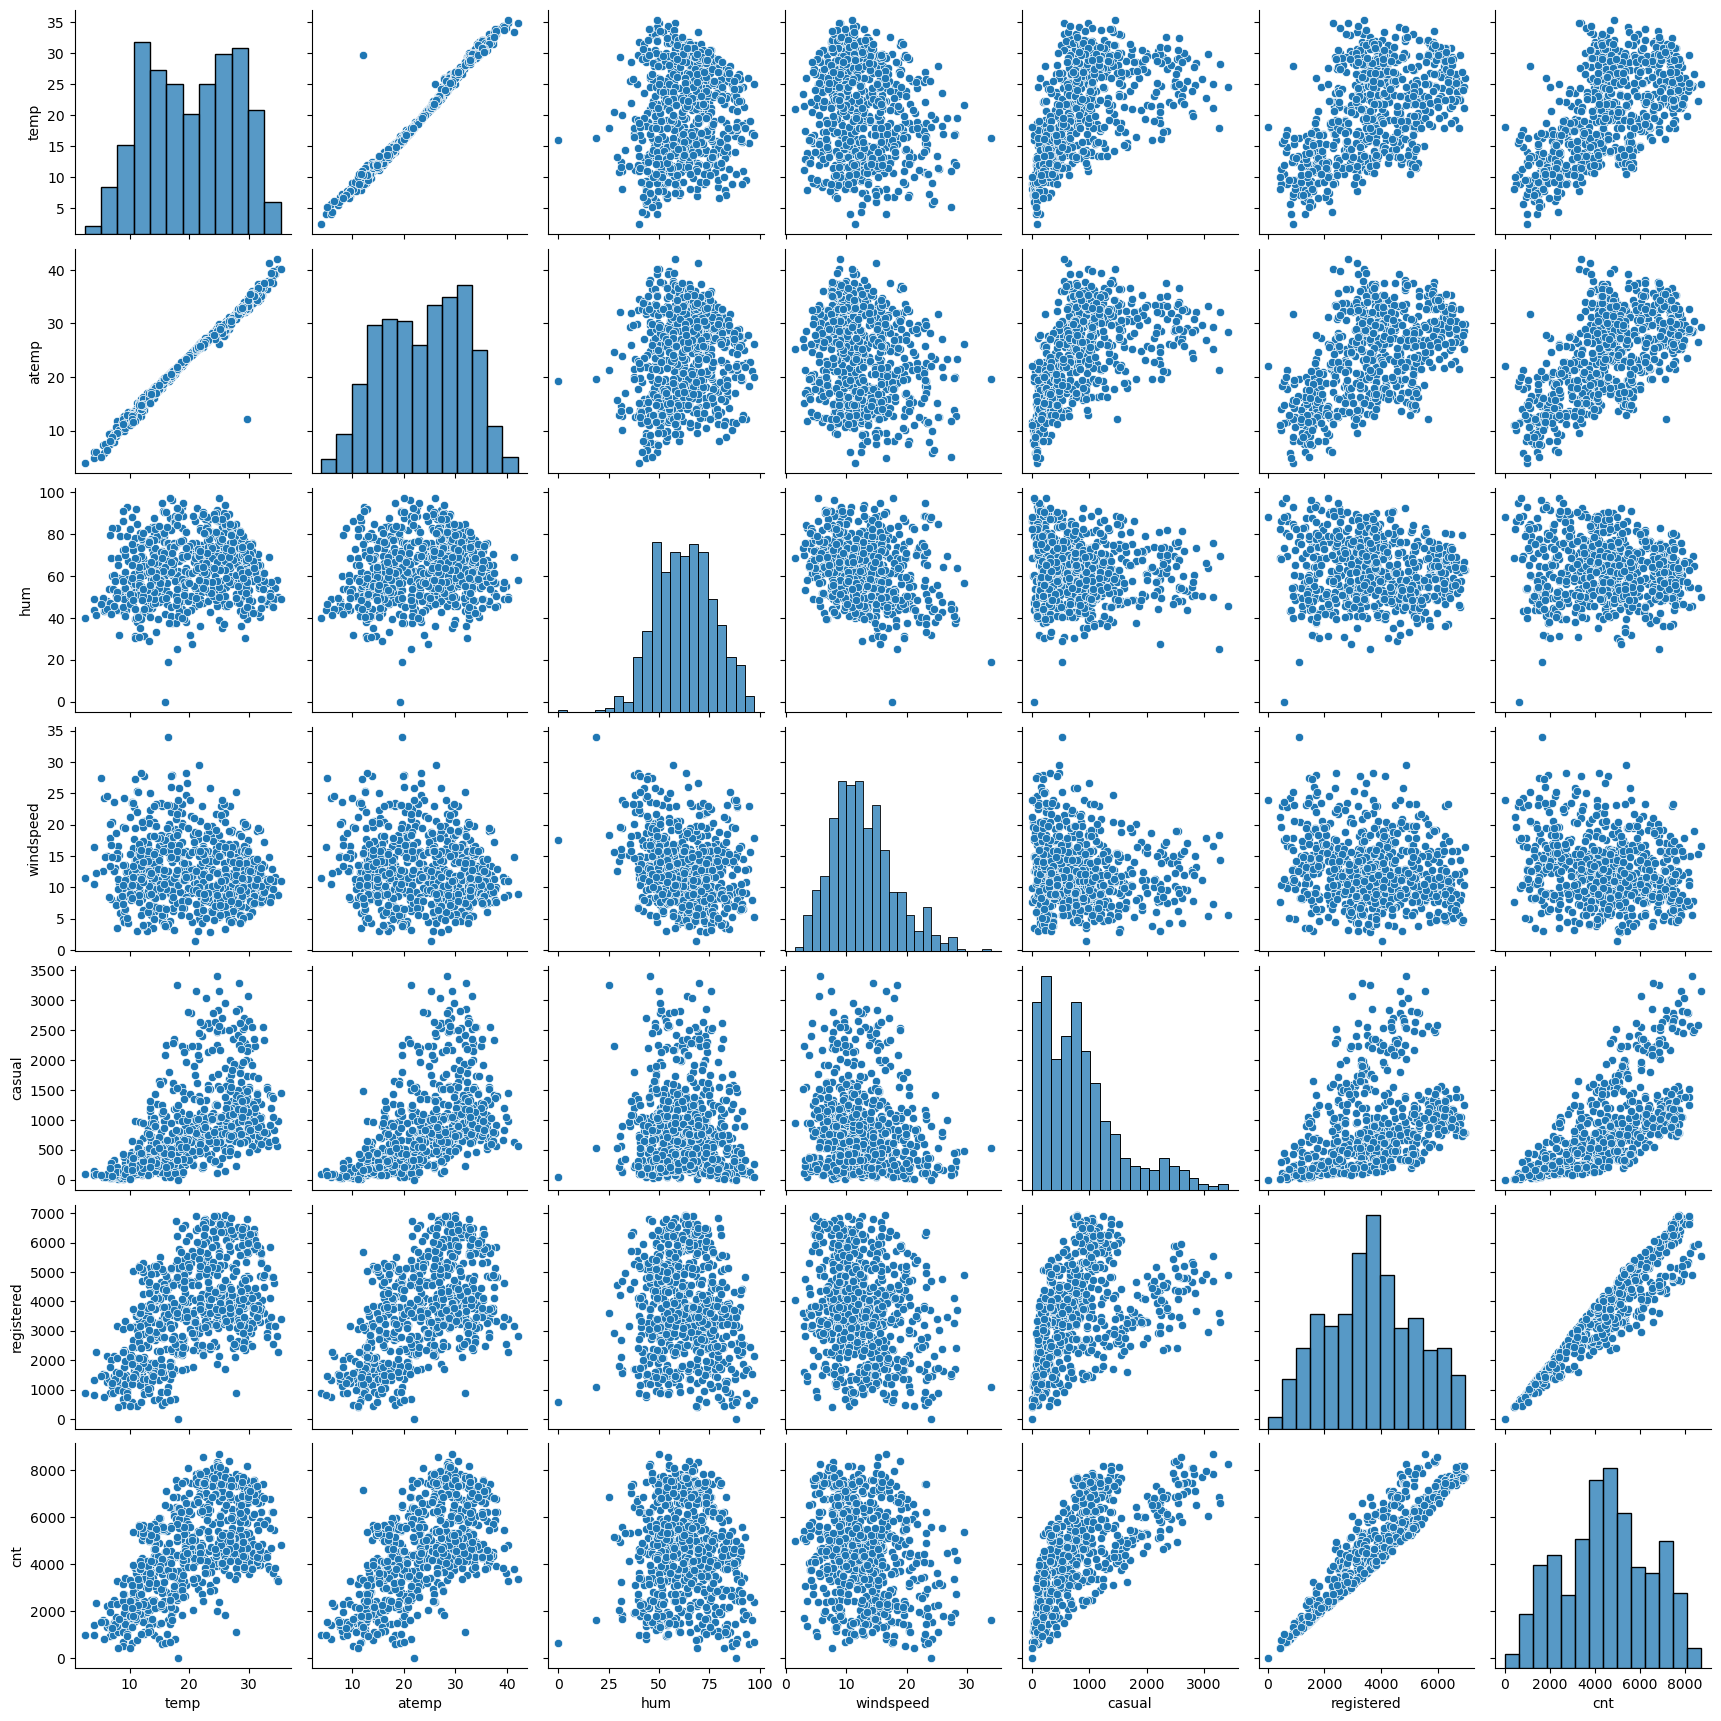

In [19]:
sns.pairplot(bikes[num_columns])
plt.show()

- For Categorical Variables Boxplot

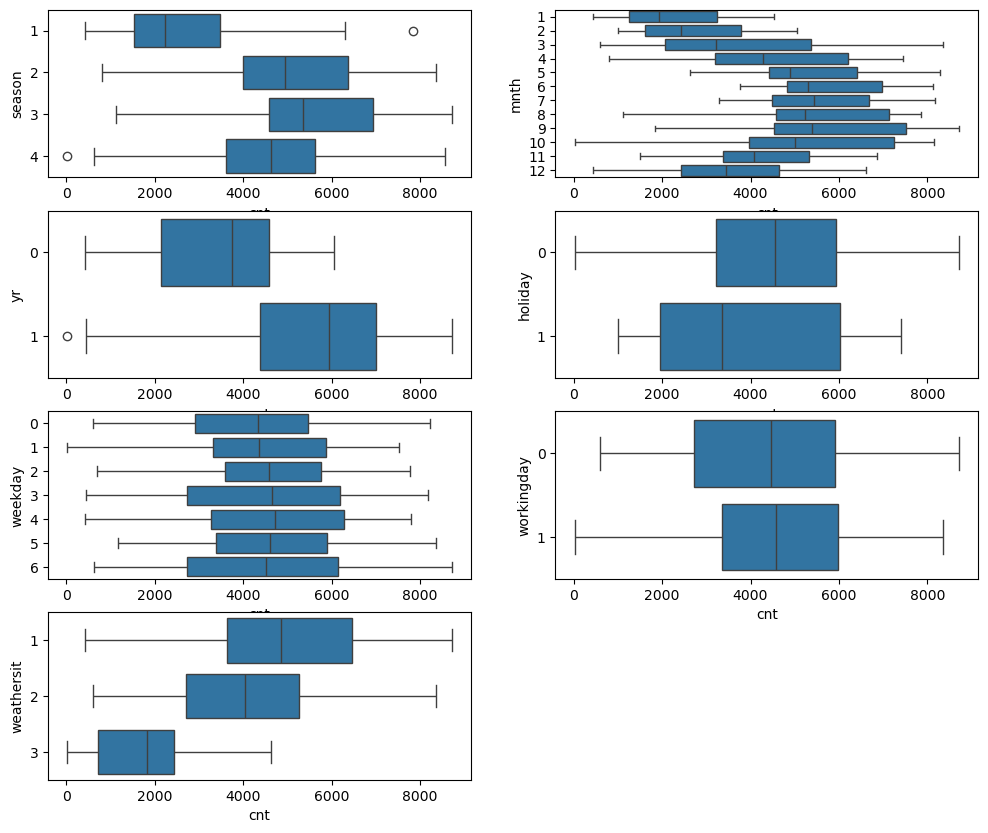

In [21]:
#cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']

plt.figure(figsize = (12,10))
plt.subplot(4, 2, 1)
sns.boxplot(data = bikes, x = 'cnt', y = 'season')
plt.subplot(4, 2, 2)
sns.boxplot(data = bikes, x = 'cnt', y = 'mnth')
plt.subplot(4, 2, 3)
sns.boxplot(data = bikes, x = 'cnt', y = 'yr')
plt.subplot(4, 2, 4)
sns.boxplot(data = bikes, x = 'cnt', y = 'holiday')
plt.subplot(4, 2, 5)
sns.boxplot(data = bikes, x = 'cnt', y = 'weekday')
plt.subplot(4, 2, 6)
sns.boxplot(data = bikes, x = 'cnt', y = 'workingday')
plt.subplot(4, 2, 7)
sns.boxplot(data = bikes, x = 'cnt', y = 'weathersit')
plt.show()

In [22]:
# Weekday:
# There seems to be some variation in the median count across different weekdays, but it's less pronounced.
# Weekday could still be included in the model, but it may have a weaker predictive power compared to other features.

# For the regression model:
# Categorical variables like season, weathersit, month, weekday, etc., should be one-hot encoded or treated as categorical variables.
# Interaction terms (such as season:workingday) might also be worth exploring.

# Step 3 : Preparing the data for modeling 

In [24]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
# dteday Provides the date thuse will be excluding from the analysis
bikes.drop('dteday', axis = 1, inplace = True )

In [26]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [28]:
bikes_dummies  = pd.get_dummies(bikes[cat_columns], drop_first = False).astype(int) # Generating Dummy Variable

In [29]:
bikes_dummies_col = bikes_dummies.columns

In [30]:
bikes_dummies[bikes_dummies_col].nunique()

mnth_1          2
mnth_2          2
mnth_3          2
mnth_4          2
mnth_5          2
mnth_6          2
mnth_7          2
mnth_8          2
mnth_9          2
mnth_10         2
mnth_11         2
mnth_12         2
season_1        2
season_2        2
season_3        2
season_4        2
yr_0            2
yr_1            2
holiday_0       2
holiday_1       2
weekday_0       2
weekday_1       2
weekday_2       2
weekday_3       2
weekday_4       2
weekday_5       2
weekday_6       2
workingday_0    2
workingday_1    2
weathersit_1    2
weathersit_2    2
weathersit_3    2
dtype: int64

In [31]:
bikes = pd.concat([bikes,bikes_dummies], axis = 1 ) # Concating the dataframes 
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,1,0
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,1,1,0,0
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,1,1,0,0


In [32]:
# Dropping the Features from which we have obtained the Dummy Variable 
bikes.drop(cat_columns, axis = 1, inplace = True)

In [33]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   casual        730 non-null    int64  
 5   registered    730 non-null    int64  
 6   cnt           730 non-null    int64  
 7   mnth_1        730 non-null    int32  
 8   mnth_2        730 non-null    int32  
 9   mnth_3        730 non-null    int32  
 10  mnth_4        730 non-null    int32  
 11  mnth_5        730 non-null    int32  
 12  mnth_6        730 non-null    int32  
 13  mnth_7        730 non-null    int32  
 14  mnth_8        730 non-null    int32  
 15  mnth_9        730 non-null    int32  
 16  mnth_10       730 non-null    int32  
 17  mnth_11       730 non-null    int32  
 18  mnth_12       730 non-null    int32

In [34]:
bikes.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'holiday_0',
       'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### Spliting data Set into Train Test Split 

In [36]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 39)
(219, 39)


### Scaling with Min Max Scaling 

In [38]:
### Scaling with Min Max Scaling 
scaler = MinMaxScaler()

In [39]:
df_train[num_columns].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
654,19.201653,23.0423,55.8333,12.208807,922,6612,7534
577,29.246653,33.1448,70.4167,11.083475,968,6248,7216
427,16.980847,20.6746,62.1250,10.792293,956,3110,4066
729,10.489153,11.5850,48.3333,23.500518,364,1432,1796
483,15.443347,18.8752,48.9583,8.708325,1120,3100,4220


In [40]:
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train[num_columns].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
654,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
577,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
427,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
729,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
483,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


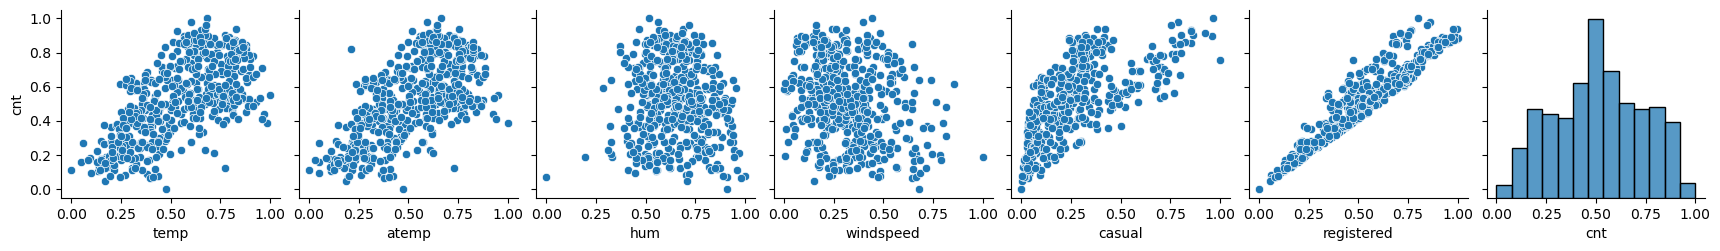

In [41]:
sns.pairplot(df_train, x_vars = num_columns,  y_vars = 'cnt')
plt.show()

In [42]:
# Focusing on the x-axis, we observe that the variables fall within the range of 0 to 1. 
# However, the graphs display a similar structure across different variables. 
# Both humidity and wind speed do not exhibit a strong linear relationship. 
# Although we can fit a line, the predictive power may not be very strong.'''

In [43]:
# Seperating X_term and y_term 
y_train = bikes.pop('cnt')
X_train = bikes

In [44]:
print(X_train.shape)
print(y_train.shape)

(730, 38)
(730,)


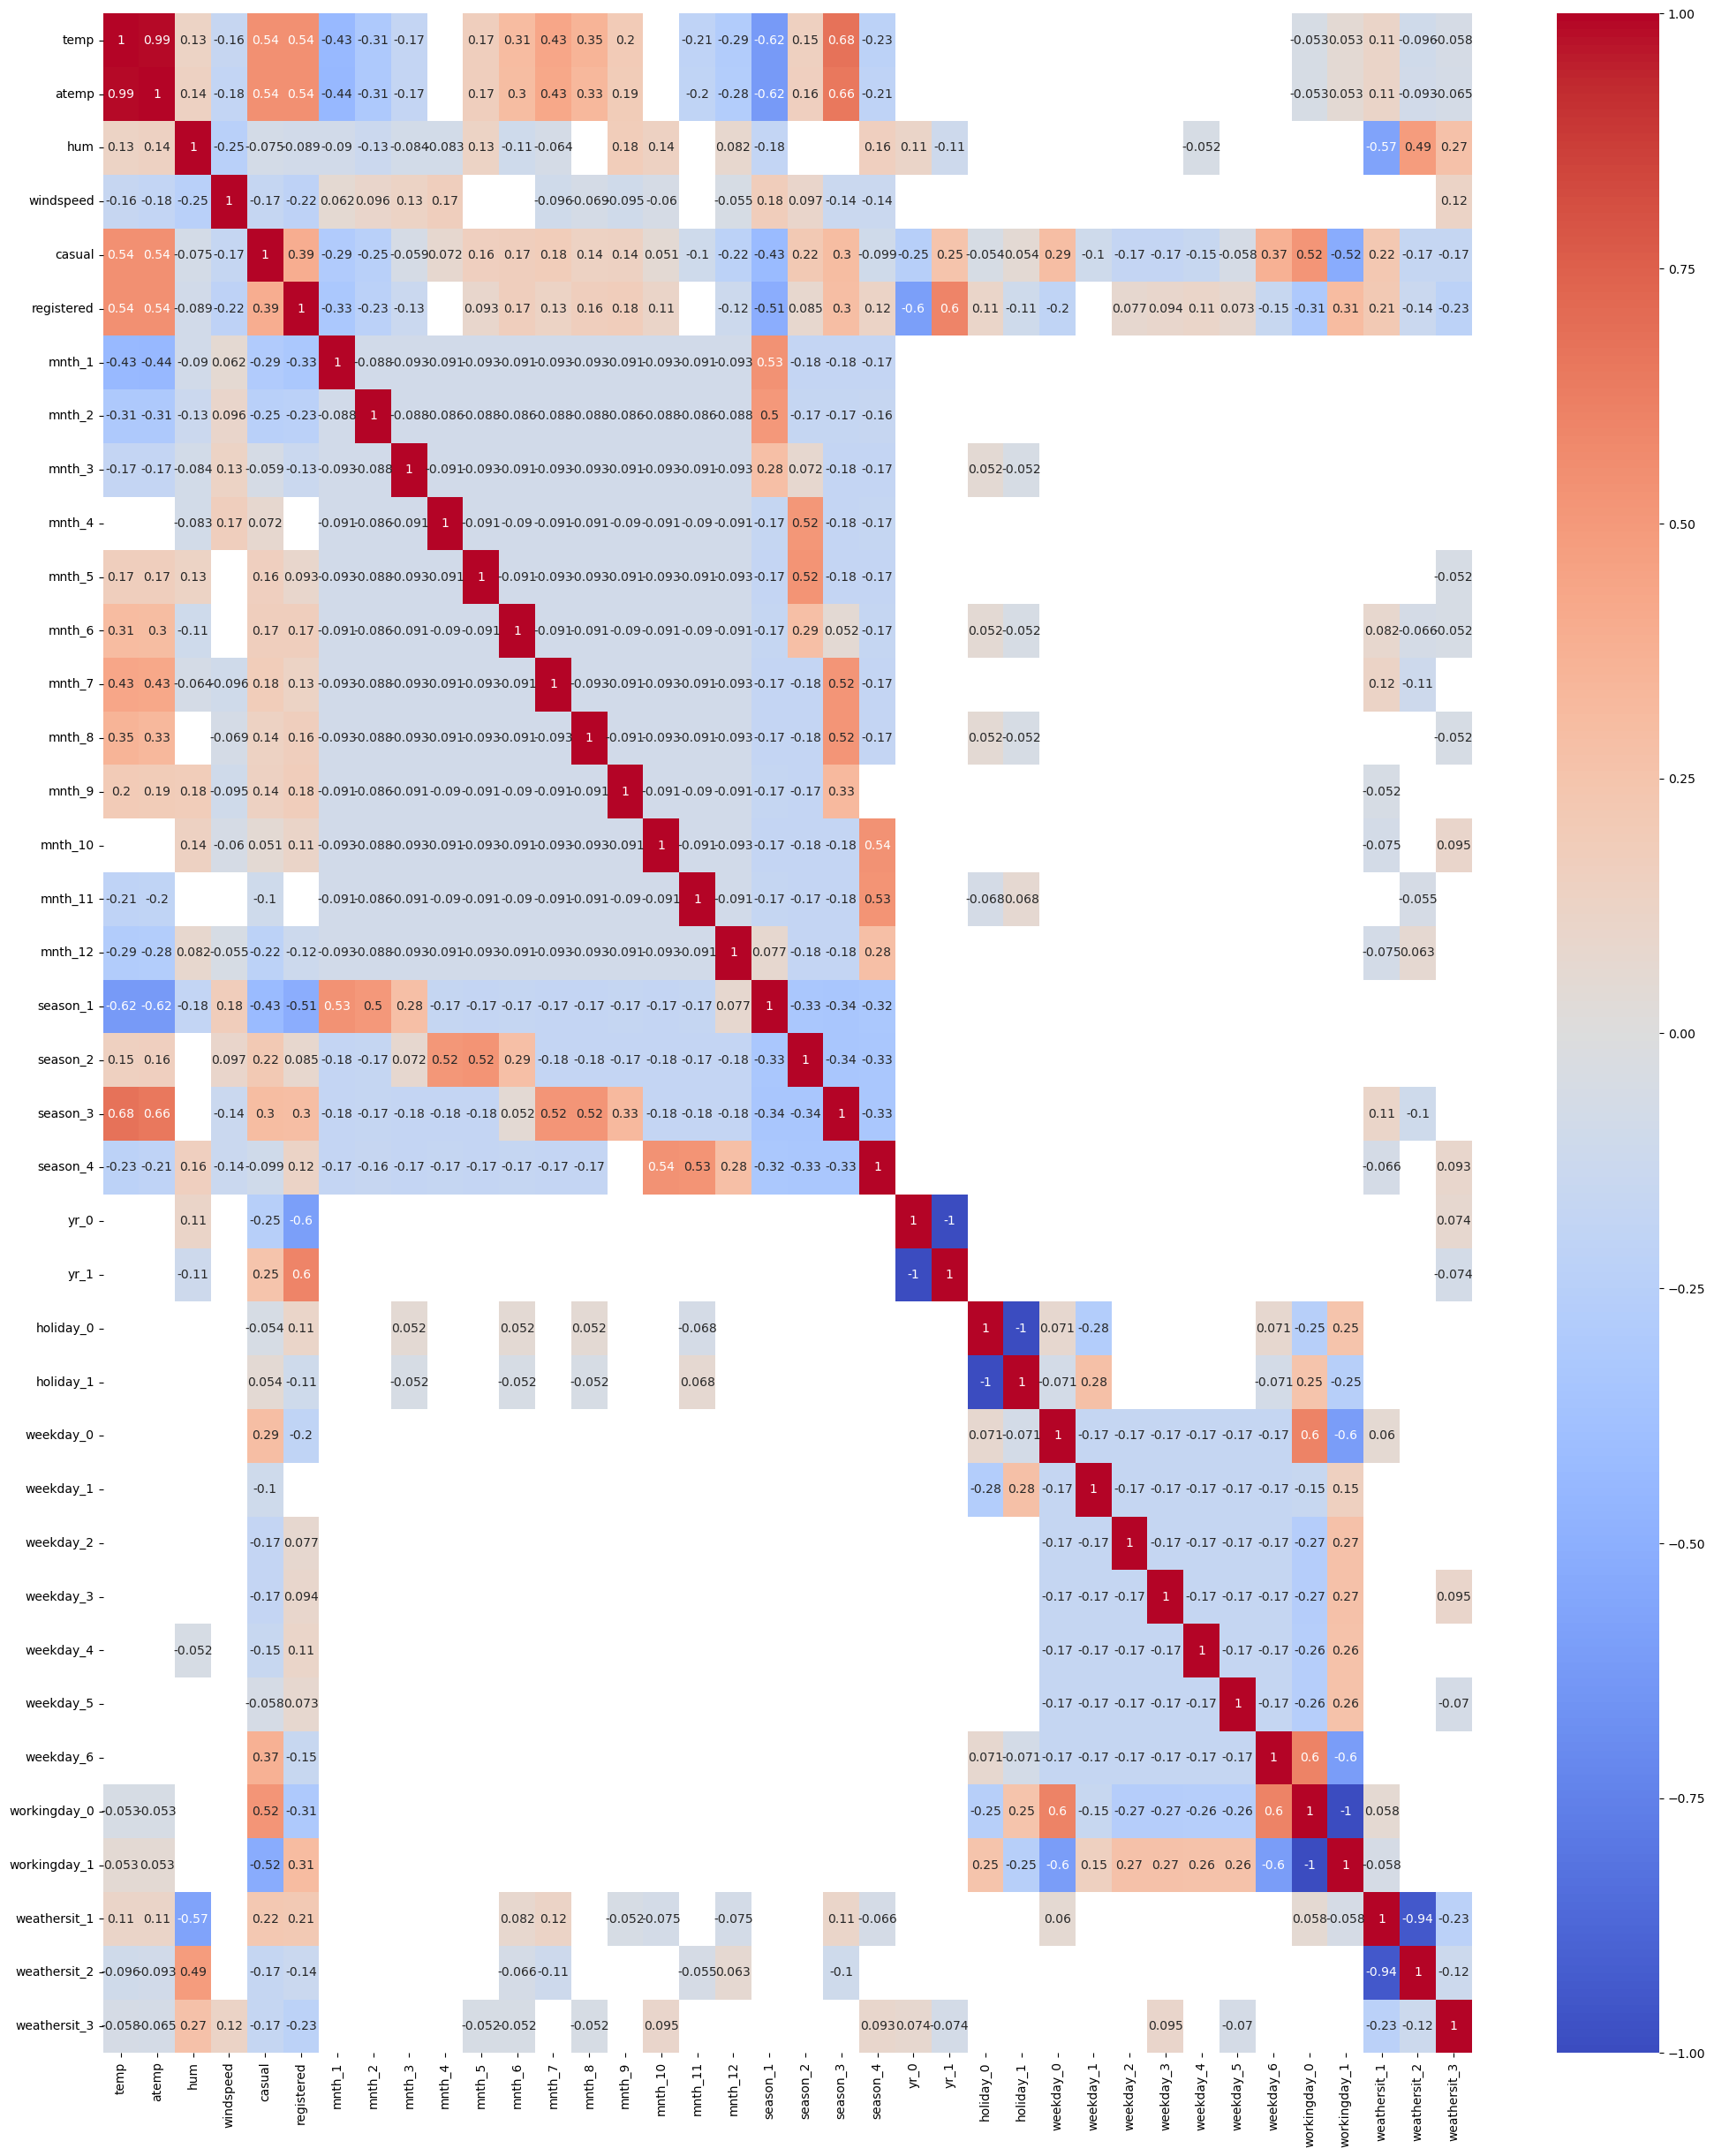

In [45]:
plt.figure(figsize = (25,30))
filtered_corr = X_train.corr().where(abs(X_train.corr()) > 0.05)
sns.heatmap(filtered_corr, annot = True, cmap='coolwarm', vmin=-1, vmax=1,mask=filtered_corr.isnull())
plt.show()

In [46]:
X_train.head()

,temp,atemp,hum,windspeed,casual,registered,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,14.902598,17.68695,69.6087,16.652113,131,670,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,8.050924,9.47025,43.7273,16.636703,120,1229,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,8.200000,10.60610,59.0435,10.739832,108,1454,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
5,9.305237,11.46350,43.6957,12.522300,82,1518,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


## Using REF

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE on top N Features

# Initializig a Linear Regression Model 
lm = LinearRegression()

# Fits the model to the test dataset 
lm.fit(X_train, y_train)

# RFE Initialization where lm will act as an estimator for the rank of the feature 
rfe = RFE(lm, n_features_to_select = 10)

# Fitting the Linear regression Model to all the feature 
rfe = rfe.fit(X_train, y_train)

In [50]:
# Interpret the results of Recursive Feature Elimination (RFE)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 22),
 ('windspeed', False, 24),
 ('casual', True, 1),
 ('registered', True, 1),
 ('mnth_1', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', False, 11),
 ('mnth_5', False, 18),
 ('mnth_6', True, 1),
 ('mnth_7', False, 19),
 ('mnth_8', False, 14),
 ('mnth_9', False, 20),
 ('mnth_10', False, 5),
 ('mnth_11', False, 27),
 ('mnth_12', False, 12),
 ('season_1', False, 16),
 ('season_2', False, 26),
 ('season_3', False, 25),
 ('season_4', False, 21),
 ('yr_0', False, 17),
 ('yr_1', False, 13),
 ('holiday_0', False, 23),
 ('holiday_1', False, 2),
 ('weekday_0', False, 8),
 ('weekday_1', False, 4),
 ('weekday_2', True, 1),
 ('weekday_3', False, 3),
 ('weekday_4', False, 29),
 ('weekday_5', False, 15),
 ('weekday_6', False, 7),
 ('workingday_0', False, 9),
 ('workingday_1', False, 10),
 ('weathersit_1', False, 6),
 ('weathersit_2', False, 28),
 ('weathersit_3', True, 1)]

In [51]:
# The list of the columns where the RFE dosent suppot the feature and are not that important.
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'mnth_4', 'mnth_5', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2'],
      dtype='object')

In [52]:
# List of columns that have high predictive power 
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'casual', 'registered', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_6', 'weekday_2', 'weathersit_3'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [54]:
# Generating X_test dataframe with RFE variables that have REF support 
X_train_rfe = X_train[col]

In [55]:
# Addin a Constant Variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the Linear Model

In [57]:
# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.084e+32
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:42:47   Log-Likelihood:                 19185.
No. Observations:                 730   AIC:                        -3.835e+04
Df Residuals:                     719   BIC:                        -3.830e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.037e-12   1.71e-13     -6.069   

In [58]:
# Dropping Registered oe Casual as cnt can be the sum of those both showing redundancy 
X_train_rfe.drop(['registered','casual'], axis = 1, inplace = True)
# Dropping Temp as Temp and atemp are highly corelatted as a temp considers humitidt so will drop temp 
X_train_rfe.drop('atemp', axis = 1, inplace = True)

In [59]:
X_train_rfe.head()

,const,temp,mnth_1,mnth_2,mnth_3,mnth_6,weekday_2,weathersit_3
instant,,,,,,,,
1,1.0,14.110847,1,0,0,0,0,0
2,1.0,14.902598,1,0,0,0,0,0
3,1.0,8.050924,1,0,0,0,0,0
4,1.0,8.200000,1,0,0,0,1,0
5,1.0,9.305237,1,0,0,0,0,0


In [60]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     91.48
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.25e-95
Time:                        19:42:47   Log-Likelihood:                -6328.5
No. Observations:                 730   AIC:                         1.267e+04
Df Residuals:                     722   BIC:                         1.271e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2359.8447    215.066     10.973   

In [61]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     91.48
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.25e-95
Time:                        19:42:48   Log-Likelihood:                -6328.5
No. Observations:                 730   AIC:                         1.267e+04
Df Residuals:                     722   BIC:                         1.271e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2359.8447    215.066     10.973   

In [62]:
X_train_rfe.drop(['mnth_6', 'weekday_2'], axis = 1, inplace = True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     128.4
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.54e-97
Time:                        19:42:48   Log-Likelihood:                -6328.5
No. Observations:                 730   AIC:                         1.267e+04
Df Residuals:                     724   BIC:                         1.270e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2356.5223    211.745     11.129   

In [63]:
X_train_rfe.drop('const', axis = 1, inplace = True)

In [64]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,1.11
3,mnth_3,1.05
2,mnth_2,1.03
1,mnth_1,1.02
4,weathersit_3,1.02
